## Data Loading

In [43]:
# Import necessary dependecies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Filter the warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Set up the data path

DATA_PATH = "./data/titanic/tested.csv"

In [45]:
# Load the data as Pandas DataFrame

data = pd.read_csv("./data/titanic/tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [46]:
# Number of rows and columns

data.shape

(418, 12)

In [47]:
# Info about dataset columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [48]:
# Some descriptive statistical information

data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [49]:
# Missing values in the data

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [50]:
# Duplicated values in the data

data.duplicated().sum()

0

## Exploratory Data Analysis

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


**Observation:** It looks like `PassengerId` and `Name` have unique identities for each record, so we'll have to drop them.

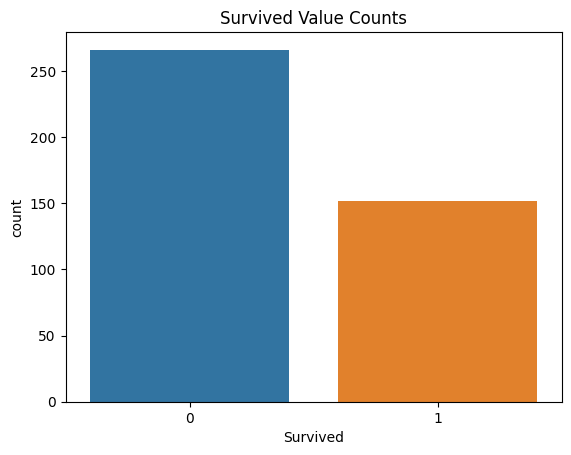

In [52]:
plt.title("Survived Value Counts")

sns.countplot(data=data, x="Survived");

**Observation:** The survival count is less than the unsurvived count, which means the dataset is unbalanced.

In [53]:
data.Pclass.value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

**Observation:** It looks like `Pclass` is a categorical feature.

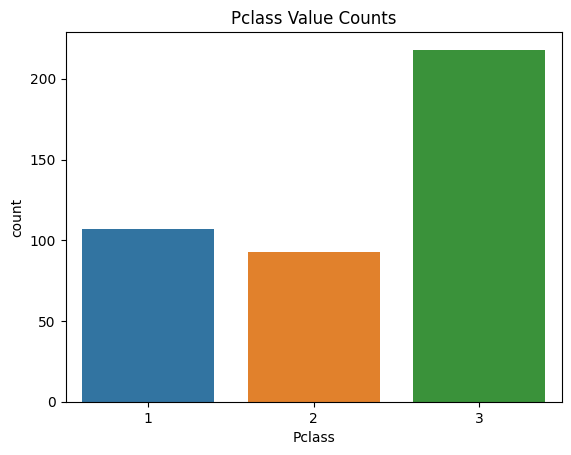

In [54]:
plt.title("Pclass Value Counts")

sns.countplot(data=data, x="Pclass");

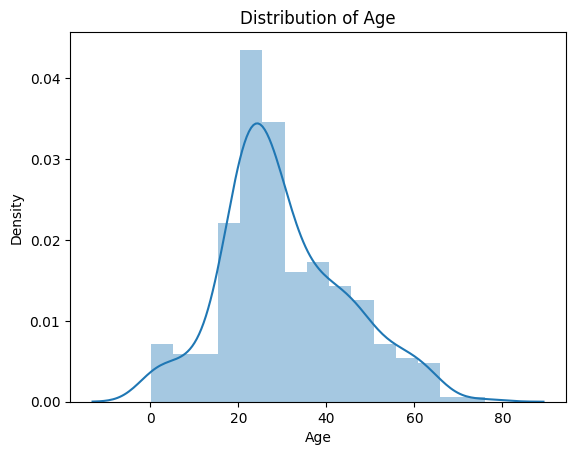

In [55]:
plt.title("Distribution of Age")

sns.distplot(data.Age);

**Observation:** It looks a little skewered; we might want to transform it.

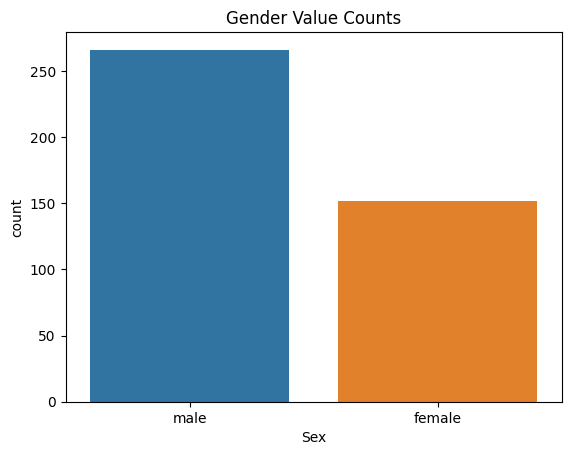

In [56]:
plt.title("Gender Value Counts")

sns.countplot(data=data, x="Sex");

In [57]:
data.SibSp.unique()

array([0, 1, 2, 3, 4, 5, 8], dtype=int64)

In [58]:
data.SibSp.value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

In [59]:
data.Parch.unique()

array([0, 1, 3, 2, 4, 6, 5, 9], dtype=int64)

In [60]:
data.Parch.value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64